In [1]:
import jax
import jax.numpy as jnp
import numpyro

In [2]:
def model():
    _n = numpyro.sample('_n', numpyro.distributions.DiscreteUniform())
    n = numpyro.deterministic('n', 1 + _n)
    x = numpyro.sample('x', numpyro.distributions.Normal(), sample_shape = (n,))

In [3]:
# inner_kernel = numpyro.infer.NUTS(model)
inner_kernel = numpyro.infer.HMC(model)

kernel = numpyro.infer.MixedHMC(inner_kernel)
# kernel = numpyro.infer.DiscreteHMCGibbs(inner_kernel)

mcmc = numpyro.infer.MCMC(kernel, num_warmup = 100, num_samples = 100)
mcmc.run(jax.random.PRNGKey(0))

sample: 100%|██████████| 200/200 [00:00<00:00, 200.37it/s, 5 steps of size 1.45e+00. acc. prob=0.91]


In [4]:
mcmc.get_samples()['x'].shape

(100, 1)

In [5]:
def model(max_dim):
    _n = numpyro.sample('_n', numpyro.distributions.DiscreteUniform())
    n = numpyro.deterministic('n', 1 + _n)
    
    with numpyro.plate('max_dim', max_dim):
        _x = numpyro.sample('_x', numpyro.distributions.Uniform())

    x = numpyro.distributions.Normal().icdf(_x)
    mask = jnp.arange(max_dim) >= n
    x = jnp.where(jnp.arange(max_dim) < n, x, jnp.nan)
    x = numpyro.deterministic('x', x)

In [6]:
inner_kernel = numpyro.infer.NUTS(model)
# inner_kernel = numpyro.infer.HMC(model)

# kernel = numpyro.infer.MixedHMC(inner_kernel)
kernel = numpyro.infer.DiscreteHMCGibbs(inner_kernel)

mcmc = numpyro.infer.MCMC(kernel, num_warmup = 100, num_samples = 100)
mcmc.run(jax.random.PRNGKey(0), max_dim = 2)

sample: 100%|██████████| 200/200 [00:01<00:00, 100.52it/s, 7 steps of size 5.35e-01. acc. prob=0.95]


In [7]:
mcmc.get_samples()

{'_n': Array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int32),
 '_x': Array([[5.32667823e-02, 5.42984962e-01],
        [7.29522705e-02, 4.84765112e-01],
        [5.31151116e-01, 2.56597310e-01],
        [6.52572393e-01, 4.54058528e-01],
        [7.51536191e-01, 5.04196107e-01],
        [1.11931421e-01, 3.61368567e-01],
        [1.90121442e-01, 2.84495354e-01],
        [5.26375696e-02, 6.91787839e-01],
        [3.24021094e-02, 7.22972274e-01],
        [5.18872067e-02, 9.81668055e-01],
        [8.45413685e-01, 4.82256353e-01],
        [5.64300478e-01, 4.21395868e-01],
        [5.64300478e-01, 4.21395868e-01],
        [4.29402500e-01, 5.91388226e-01],
        [2.20936283e-01, 2.89939493e-01],
   

In [8]:
import numpy as np
import matplotlib.pyplot as plt

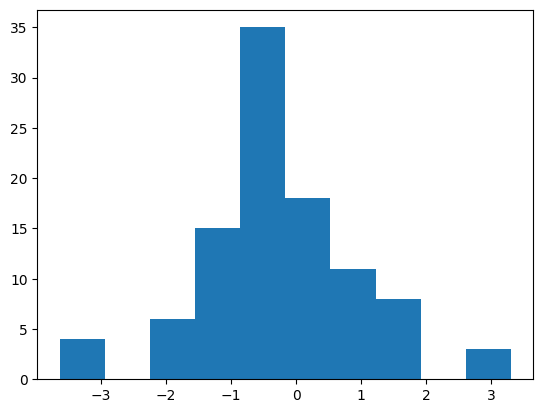

In [9]:
plt.hist(np.array(mcmc.get_samples()['x'][:, 0]));